# Assignment 1

Instructions:
- You may work on this file directly, and fill in your answers/code below. Add more cells if necessary.
- For code cells, run your code and make sure the output is visible (unless I state that no output is needed).
- Save the notebook as a HTML file (File > Download as > HTML).
- Submit this to Canvas under Assignment 1.

This assignment has 2 parts:
1. In the first part, you will carry out descriptive analytics similar to Notebook 1
2. In the second part, you will carry out predictive analytics similar to Notebook 2

# Part 1 - Descriptive Analytics

For this part, we will use the ```insurance.csv``` dataset. This is based on a dataset of insurance claims (or expenses) from a US insurance company.

The variables should be pretty self-explanatory. The ```region``` variable refers to which region of US the customer is from.

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('insurance.csv')
df

,age,height,weight,children,smoker,region,expenses
0,19,171,82,0,yes,southwest,16884.92
1,18,168,96,1,no,southeast,1725.55
2,28,192,122,3,no,southeast,4449.46
3,33,152,53,0,no,northwest,21984.47
4,32,163,77,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,152,72,3,no,northwest,10600.55
1334,18,155,77,0,no,northeast,2205.98
1335,18,177,116,0,no,southeast,1629.83
1336,21,153,61,0,no,southwest,2007.95


We will add a new column ```high_expense``` to indicate whether the customer's expenses exceed $30,000.

This gives an example of a dataset with 2 possible targets: ```expenses``` (regression) or ```high_expense``` (classification).

In [102]:
df['high_expense'] = df['expenses'] > 30000
df

,age,height,weight,children,smoker,region,expenses,high_expense
0,19,171,82,0,yes,southwest,16884.92,False
1,18,168,96,1,no,southeast,1725.55,False
2,28,192,122,3,no,southeast,4449.46,False
3,33,152,53,0,no,northwest,21984.47,False
4,32,163,77,0,no,northwest,3866.86,False
...,...,...,...,...,...,...,...,...
1333,50,152,72,3,no,northwest,10600.55,False
1334,18,155,77,0,no,northeast,2205.98,False
1335,18,177,116,0,no,southeast,1629.83,False
1336,21,153,61,0,no,southwest,2007.95,False


### 1.  Compute the number of high expense and low expense customers.
(1 mark)

_Hint: Use what we have learned in Notebook 1._

In [103]:
df['high_expense'].value_counts()

high_expense
False    1176
True      162
Name: count, dtype: int64

### 2.  Compute the number of smokers and non-smokers.
(1 mark)

In [104]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

### 3.  Compute the number of customers in all combinations of high/low expense and smoker/non-smoker.
(1 mark)

In [105]:
df.groupby(['high_expense','smoker']).size().reset_index().rename(columns={0:'count'})

,high_expense,smoker,count
0,False,no,1054
1,False,yes,122
2,True,no,10
3,True,yes,152


### 4. Visually represent the proportion of high and low expense customers among smokers and non-smokers.
(1 mark)

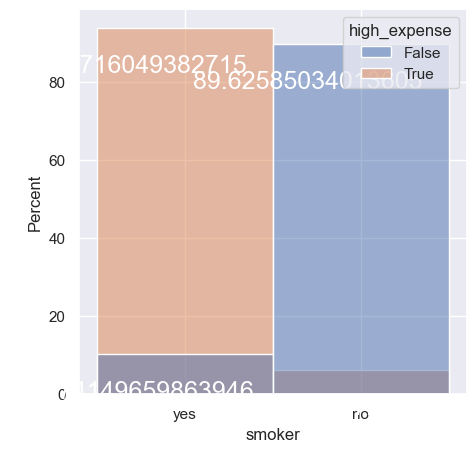

In [106]:
ax=sns.histplot(df, 
             x = 'smoker', 
             hue = 'high_expense',
             stat = 'percent',    
             common_norm = False
            )
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
sns.set(rc={"figure.figsize":(20, 30)})

### 5. Comment on the above chart.
(1 mark)

**Answer:**

the above chart indicates that if a person smokes, it has approximately 10% chance of the customer being in low expense and 93% of being in high expense.
and if a person does not smoke, it has approximately 6% chance of the customer being in high expense and 89% of being in low expense.

### 6. Compute the average expenses among your customers.
(1 mark)

(You don't have to use ```describe```. If you do, find a way to extract only the mean of expenses.)

In [107]:
df['expenses'].mean()

13270.422414050823

### 7. Plot a histogram to show the distribution of expenses among your customers.
(1 mark)

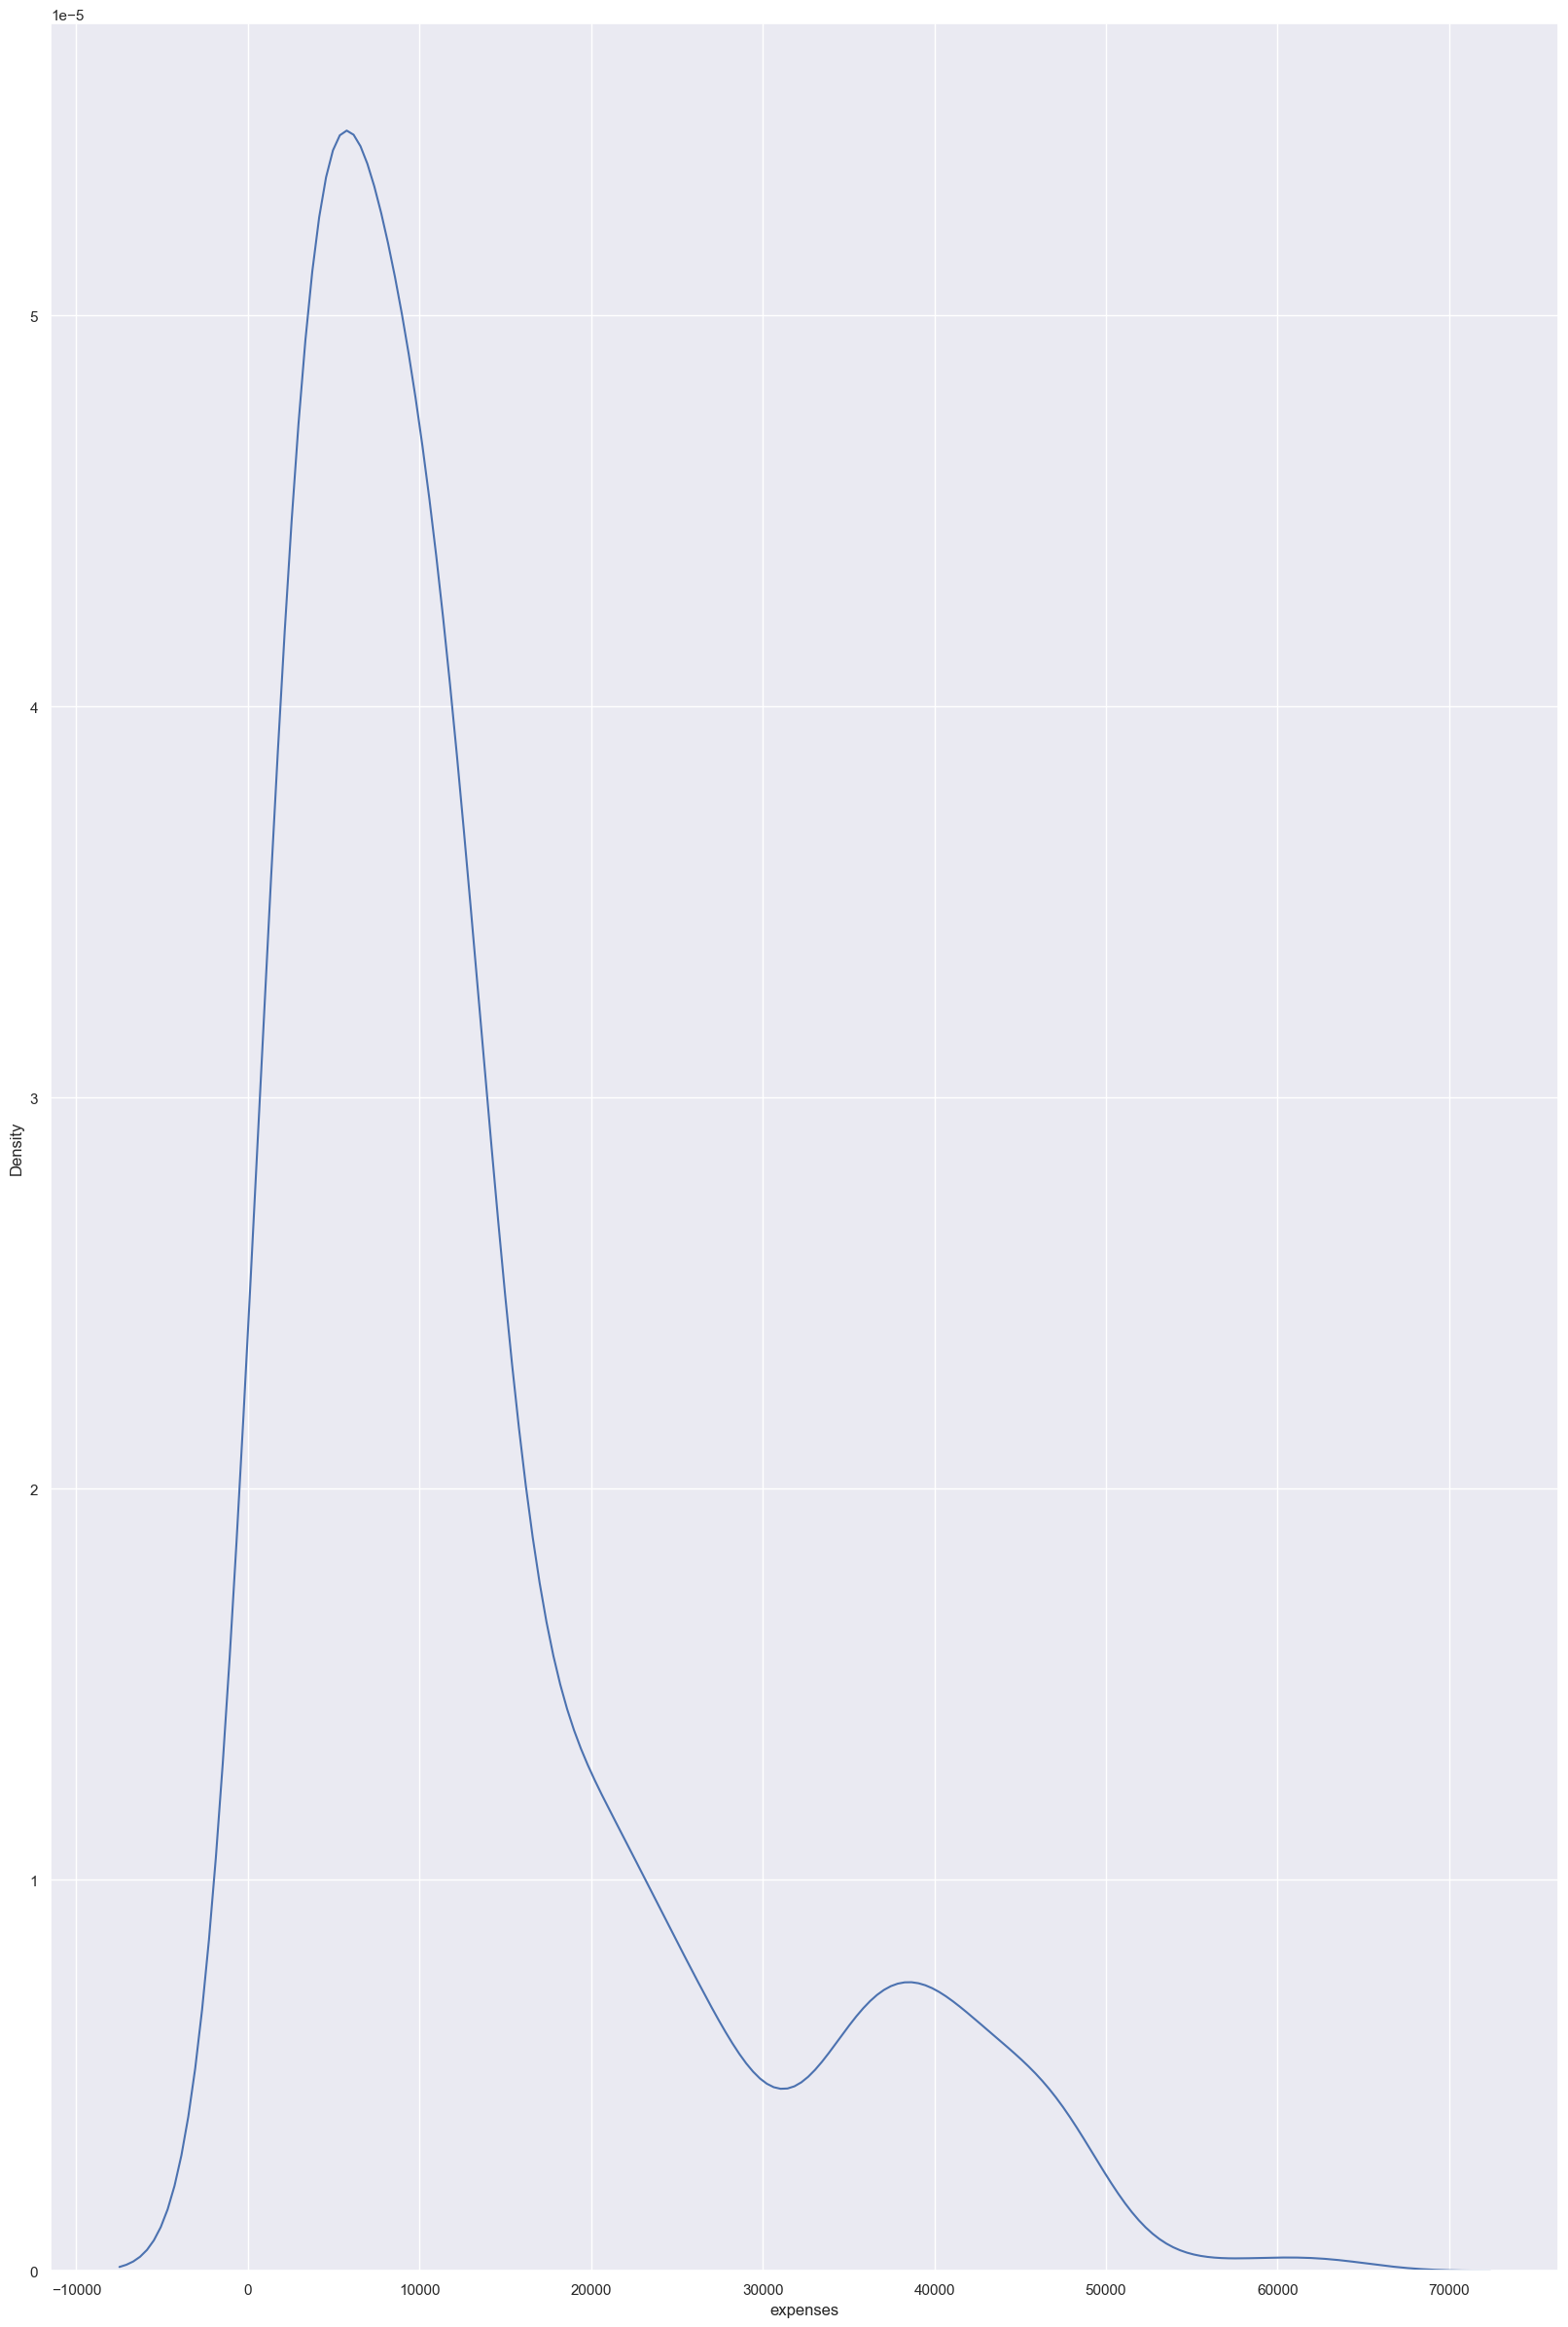

In [108]:
sns.kdeplot(df, x = 'expenses')
sns.set(rc={"figure.figsize":(2, 2)})

### 8. Plot a histogram to show the distribution of expenses among smokers and non-smokers.
(1 mark)

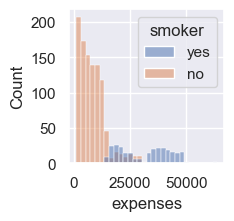

In [109]:
sns.histplot(df, x = 'expenses', hue ='smoker')
sns.set(rc={"figure.figsize":(10, 10)})

### 9. Plot a histogram to show the distribution (counts) of weights among high and low expense customers.
(1 mark)

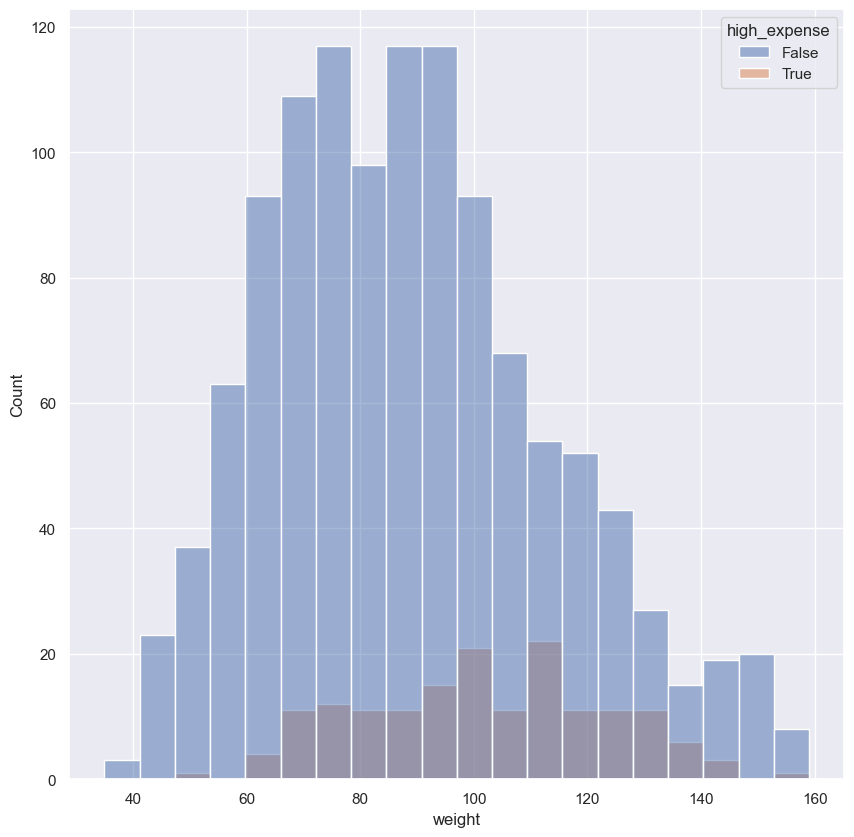

In [110]:
sns.histplot(df, x = 'weight', hue ='high_expense')
sns.set(rc={"figure.figsize":(5, 5)})

### 10. Repeat Q9 with proportions instead of counts, and adjust for the imbalance in high vs. low expense customers so that they are more comparable.
(1 mark)

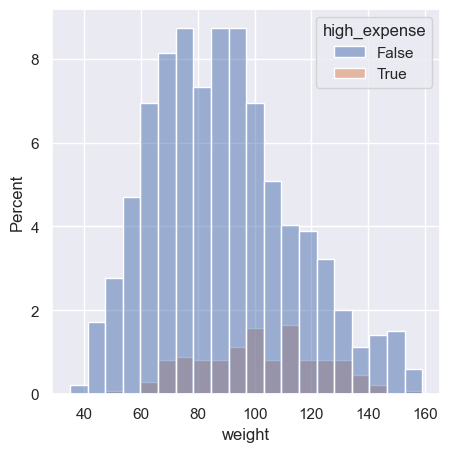

In [111]:
sns.histplot(df, x = 'weight', hue ='high_expense', stat = 'percent')
sns.set(rc={"figure.figsize":(5, 5)})

# Part 2 - Predictive Analytics

In this assignment, we will use the same 3rd-order polynomial model that we saw in Notebook 2, but with a slightly different range of $x$ values.

$$y = 1 - 2x + 6x^2 - x^3 + \varepsilon, ~~ \varepsilon \sim \text{N}(0, \sigma^2).$$

Run the following cell first, to generate the dataset and visualize the curve.

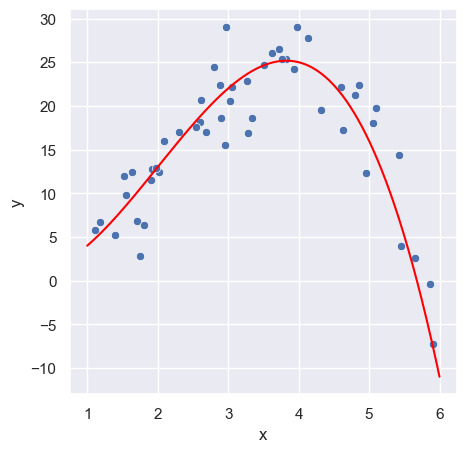

In [49]:
# Simulate the dataset (don't worry about this code)

# Define our polynomial
def p(x):
    return 1 - 2 * x + 6 * x**2 - x**3

# Fix our range of x
x_min = 1
x_max = 6

# Sample from a function with noise
def sample(f, n, sigma, x_min, x_max, random_state = None):    
    np.random.seed(random_state)
    X   = np.random.uniform(x_min, x_max, size = (n,1))
    eps = np.random.normal(0, sigma, size = (n,1))
    y = f(X) + eps
    return np.concatenate([X, y], axis = 1)

# Plot a function
def plot(f, x_min, x_max, color):
    X = np.linspace(x_min, x_max, 1000)[:, None]
    line_data = pd.DataFrame(X, columns = ['x'])
    line_data['y'] = f(line_data)
    sns.lineplot(data = line_data, x = 'x', y = 'y', color = color)

# Create data
data = sample(f = p,    # <-- sample from our polynomial function p
              n = 50,   # <-- number of rows to generate
              sigma = 3, 
              x_min = x_min, 
              x_max = x_max,
              random_state = 2023
             )

# Place data in a DataFrame
df = pd.DataFrame(data, columns = ['x', 'y'])

# Visualize the dataset
sns.scatterplot(data = df, x = 'x', y = 'y')
plot(p, x_min, x_max, 'red')  # <-- custom function defined above to plot curves

In [50]:
X = df[['x']] 
y = df['y']  

### 11. Extract ```X``` (as a DataFrame) and ```y``` (as a Series), and perform a train-test split..
(1 marks)

Use a 70-30 train-test split (i.e. 30% test data) with ```random_state = 2023```.

You should end up with 4 variables: ```X_train, y_train, X_test``` and ```y_test``` (not necessarily in that order).

The cell does not need to have output.

In [51]:
X.shape, y.shape

((50, 1), (50,))

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2023)

### 12. Fit a linear regression model and compute and print the train and test MSE.
(2 marks)

Make sure to print the output.

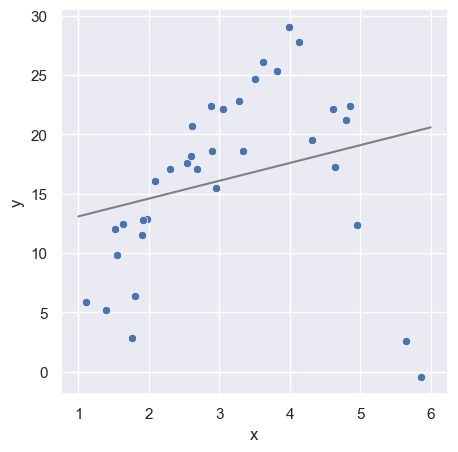

In [53]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

sns.scatterplot(x = X_train['x'], y = y_train)
plot(model.predict, x_min, x_max, color = 'grey')

In [54]:
from sklearn.metrics import mean_squared_error 

train_error = mean_squared_error(model.predict(X_train), y_train)  
test_error = mean_squared_error(model.predict(X_test), y_test)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 51.11782515853135
Test error: 107.44916996318926


### 13. Fit a degree 3 polynomial regression model and compute and print the train and test MSE.
(2 marks)

You may use the ```PolynomialRegression``` model from Notebook 2.

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

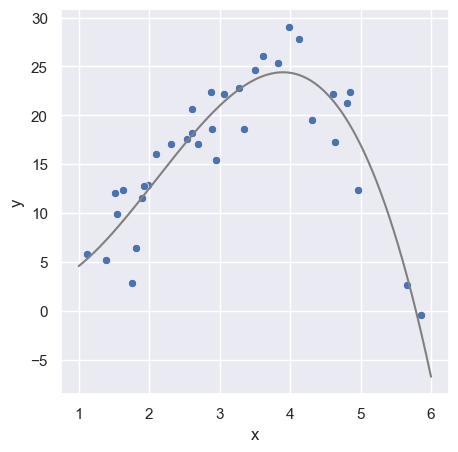

In [56]:
d = 3

poly = PolynomialRegression(degree = d)   # <-- initialize
poly.fit(X_train, y_train)                # <-- fit just like any other model

sns.scatterplot(x = X_train['x'], y = y_train)
plot(poly.predict, x_min, x_max, color = 'grey')

In [57]:
train_error = mean_squared_error(poly.predict(X_train), y_train)  
test_error = mean_squared_error(poly.predict(X_test), y_test)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 8.601519124104287
Test error: 15.089687179532634


### 14. For $d=1,2,3,\cdots, 8$, fit a degree $d$ polynomial regression model, and compute the training and test MSE. Store the train and test MSEs in a dataframe called ```poly_mse_df```, and plot the train and test error curves.
(2 marks)

In [88]:
i = range(1,9)   
poly_mse_df = pd.DataFrame(index = i, columns = ['train_MSE','test_MSE'])

In [89]:
for i in range(1,9):
    poly2 = PolynomialRegression(degree = i)   
    poly2.fit(X_train, y_train)
    train_error = mean_squared_error(poly2.predict(X_train), y_train)  
    test_error = mean_squared_error(poly2.predict(X_test), y_test)
    print('Train error:', train_error)
    print('Test error:', test_error)
    poly_mse_df['train_MSE'][i]=train_error
    poly_mse_df['test_MSE'][i]=test_error

Train error: 51.11782515853135
Test error: 107.44916996318926
Train error: 12.513905238998754
Test error: 22.87148761005875
Train error: 8.601519124104287
Test error: 15.089687179532634
Train error: 8.478594892398364
Test error: 15.790830074721852
Train error: 8.286544609053303
Test error: 18.763928974873384
Train error: 8.112352556713054
Test error: 21.970384261933543
Train error: 8.067429036233959
Test error: 21.180528584868178
Train error: 7.929515542188475
Test error: 21.411796227445716


In [90]:
poly_mse_df

,train_MSE,test_MSE
1,51.117825,107.44917
2,12.513905,22.871488
3,8.601519,15.089687
4,8.478595,15.79083
5,8.286545,18.763929
6,8.112353,21.970384
7,8.067429,21.180529
8,7.929516,21.411796


<Axes: >

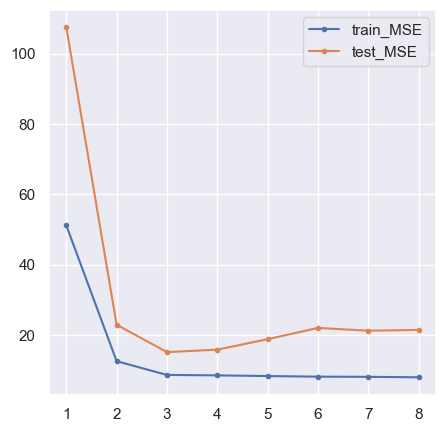

In [91]:
poly_mse_df.plot(marker = '.')

### 15. For $k=1,2,3,\cdots, 10$, fit a $k$-nearest neighbours model, and compute the training and test MSE. Store the train and test MSEs in a dataframe called ```knn_mse_df```, and plot the train and test error curves.
(2 marks)

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
i = range(1,10)   
knn_mse_df = pd.DataFrame(index = i, columns = ['train_MSE','test_MSE'])

In [97]:
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = i)  
    knn.fit(X_train, y_train)
    train_error = mean_squared_error(knn.predict(X_train), y_train)  
    test_error = mean_squared_error(knn.predict(X_test), y_test)
    print('Train error:', train_error)
    print('Test error:', test_error)
    knn_mse_df['train_MSE'][i]=train_error
    knn_mse_df['test_MSE'][i]=test_error

Train error: 0.0
Test error: 36.20619098462669
Train error: 3.599202213590517
Test error: 30.292027415092416
Train error: 6.750446528798963
Test error: 27.964238650126948
Train error: 11.24849597582863
Test error: 33.04995170141786
Train error: 15.077132014612543
Test error: 39.11826580440564
Train error: 15.906294664089799
Test error: 42.892997976465416
Train error: 17.168679866379417
Test error: 48.69489720861646
Train error: 19.47132812311214
Test error: 52.68391559074369
Train error: 21.75824480167239
Test error: 58.40985831983105


In [98]:
knn_mse_df

,train_MSE,test_MSE
1,0.0,36.206191
2,3.599202,30.292027
3,6.750447,27.964239
4,11.248496,33.049952
5,15.077132,39.118266
6,15.906295,42.892998
7,17.16868,48.694897
8,19.471328,52.683916
9,21.758245,58.409858


<Axes: >

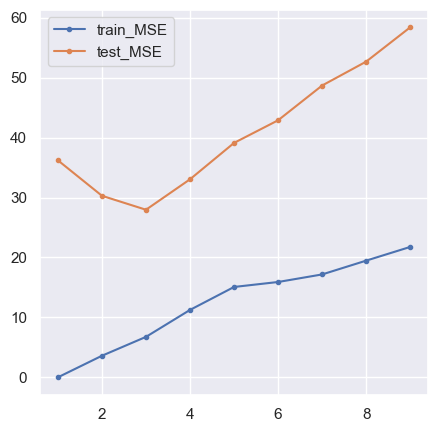

In [99]:
knn_mse_df.plot(marker = '.')

### 16.  Look at the validation curves for polynomial regression and nearest neighbours, and fill in the blanks below.
(1 mark)

**Answer:**

For polynomial regression, as the degree $d$ increases, the model becomes ** more ** complex.

For nearest neighbors, as the number of neighbors $k$ increases, the model becomes ** more ** complex.